shape: (20, 13)
churn value counts:
churn
0    14
1     6
Name: count, dtype: int64

Missing values per column:
 age                   0
income                0
tenure_months         0
monthly_spend         0
support_tickets       0
has_app               0
last_login_days       0
satisfaction_score    0
region                0
contract_type         0
payment_method        0
post_churn_refund     0
churn                 0
dtype: int64

Duplicates: 0


,age,income,tenure_months,monthly_spend,support_tickets,has_app,last_login_days,satisfaction_score,region,contract_type,payment_method,post_churn_refund,churn
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20,20,20,20.000000,20.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,month-to-month,card,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,10,NaN,NaN
mean,35.000000,40075.000000,22.850000,16.615000,2.100000,0.800000,19.200000,3.500000,NaN,NaN,NaN,0.100000,0.300000
std,9.347108,18145.809289,17.780163,6.923969,1.552587,0.410391,18.724035,1.432701,NaN,NaN,NaN,0.307794,0.470162
min,22.000000,17500.000000,2.000000,6.500000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000
25%,27.750000,23250.000000,6.000000,10.325000,1.000000,1.000000,3.750000,2.000000,NaN,NaN,NaN,0.000000,0.000000
50%,33.000000,38500.000000,19.000000,16.200000,2.000000,1.000000,11.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000
75%,41.500000,52500.000000,37.000000,22.925000,3.000000,1.000000,34.500000,5.000000,NaN,NaN,NaN,0.000000,1.000000


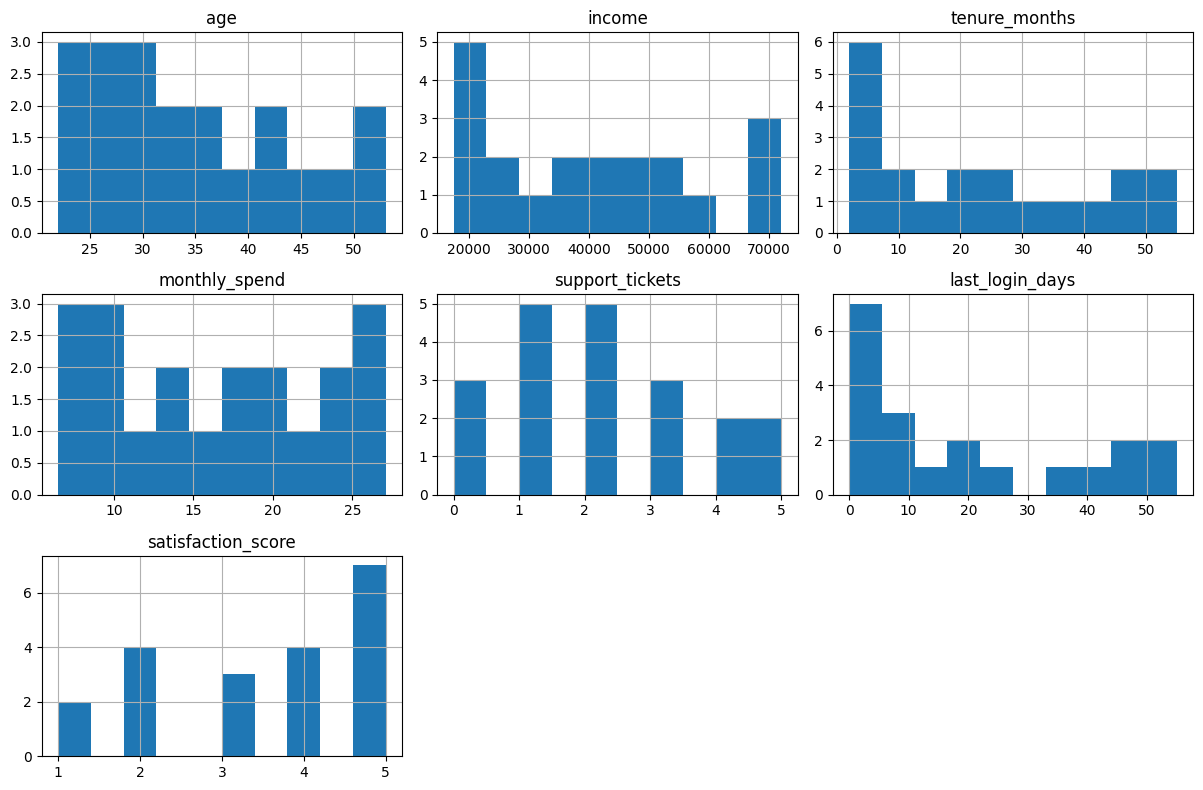

<Figure size 600x300 with 0 Axes>

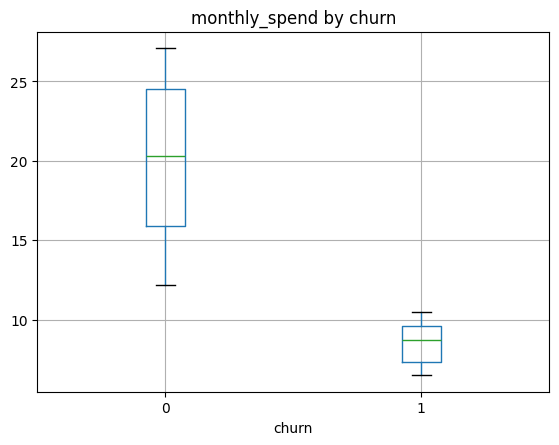

<Figure size 600x300 with 0 Axes>

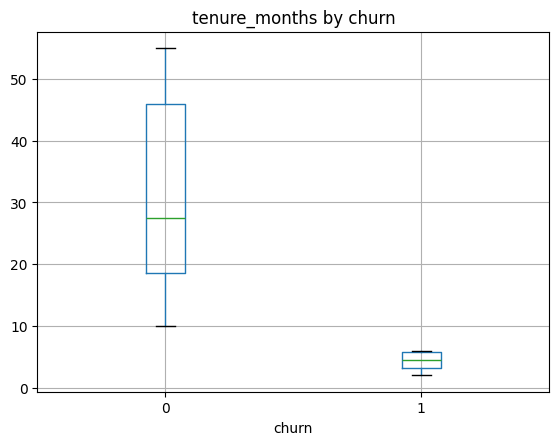

<Figure size 600x300 with 0 Axes>

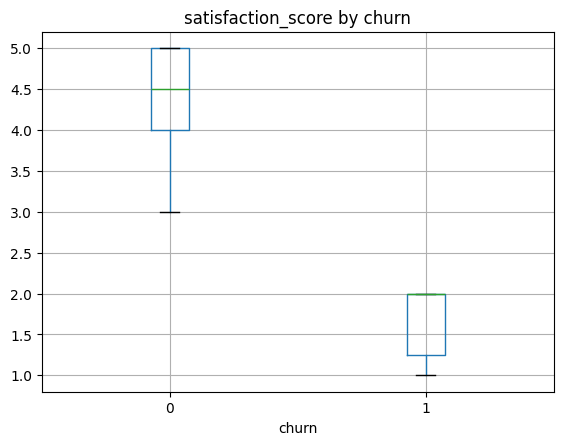

<Figure size 600x300 with 0 Axes>

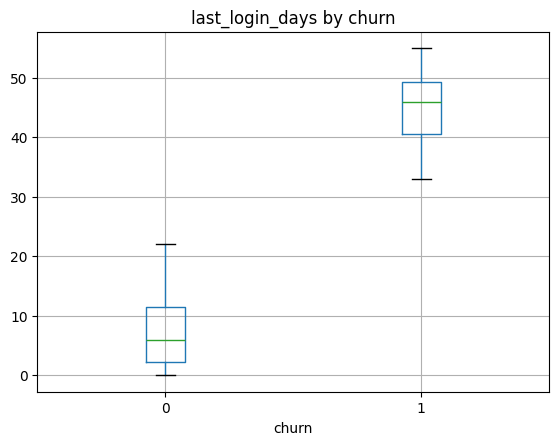

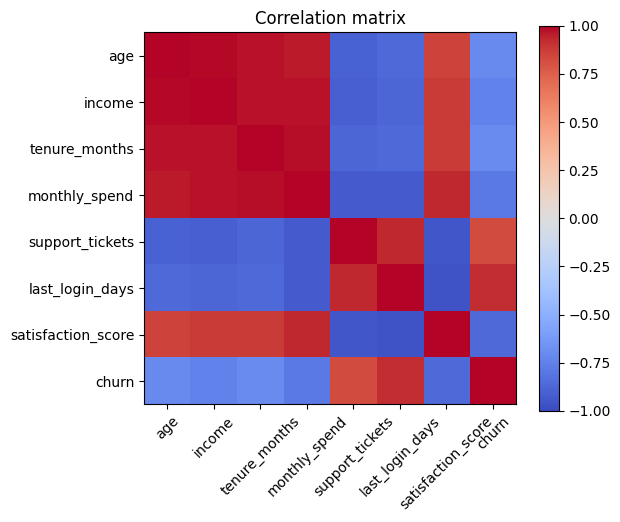

Baseline CV (recall) for Logistic Regression and RandomForest
LogisticRegression recall mean: 1.000, std: 0.000
RandomForestClassifier recall mean: 1.000, std: 0.000
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best RF params: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}
Best RF CV score (f1): 1.0
Best LR params: {'clf__C': 1}
Best LR CV score (f1): 1.0
Using best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income',
                                                   'tenure_months',
     

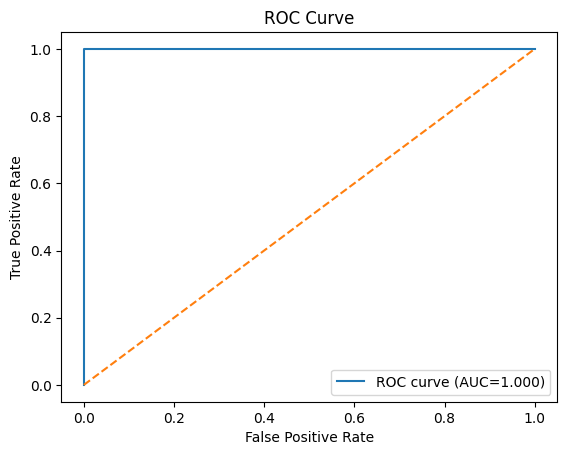

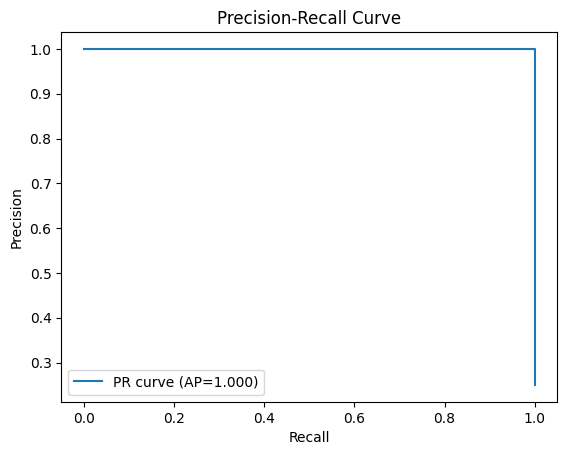

Top features by permutation importance:
has_app_1: importance=0.0000 +/- 0.0000
has_app_0: importance=0.0000 +/- 0.0000
payment_method_transfer: importance=0.0000 +/- 0.0000
payment_method_ewallet: importance=0.0000 +/- 0.0000
payment_method_card: importance=0.0000 +/- 0.0000
contract_type_two-year: importance=0.0000 +/- 0.0000
contract_type_one-year: importance=0.0000 +/- 0.0000
contract_type_month-to-month: importance=0.0000 +/- 0.0000
region_D: importance=0.0000 +/- 0.0000
region_C: importance=0.0000 +/- 0.0000
Segment metrics by region on TEST set:
   count  precision  recall   f1
B    1.0        0.0     0.0  0.0
A    1.0        1.0     1.0  1.0
C    2.0        0.0     0.0  0.0
Segment metrics by contract_type on TEST set:
                count  precision  recall   f1
one-year          2.0        0.0     0.0  0.0
month-to-month    1.0        1.0     1.0  1.0
two-year          1.0        0.0     0.0  0.0
Final model saved to C:\machine_learning\model.pkl
Example predict_one output: 

In [1]:
# ### UTS_Churn_Notebook.py (paste into a Jupyter cell-by-cell)
# Environment: Python 3.8+, libraries: pandas, numpy, matplotlib, seaborn (optional), scikit-learn, joblib

import warnings
warnings.filterwarnings('ignore')

# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import joblib

# scikit-learn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score)

from sklearn.inspection import permutation_importance

# ---------------------------
# 1) Load dataset (dari multiline string yang disalin dari UTS.pdf)
# ---------------------------
DATA = """age,income,tenure_months,monthly_spend,support_tickets,has_app,last_login_days,satisfaction_score,region,contract_type,payment_method,post_churn_refund,churn
25,24000,6,10.5,3,1,45,2,A,month-to-month,card,0,1
32,36000,24,18.2,1,1,8,5,B,one-year,transfer,0,0
41,52000,36,22.8,2,1,4,4,C,two-year,card,0,0
28,19000,5,8.4,4,0,39,2,A,month-to-month,ewallet,0,1
37,48000,30,20.7,1,1,5,5,B,one-year,card,0,0
45,61000,50,26.4,1,1,2,5,C,two-year,transfer,0,0
22,18000,3,6.5,5,0,50,1,A,month-to-month,card,0,1
53,72000,48,24.9,0,1,1,5,D,two-year,card,0,0
29,25000,12,13.0,3,1,21,3,B,month-to-month,transfer,0,0
34,42000,20,16.8,2,1,12,4,C,one-year,ewallet,0,0
26,21000,4,9.1,4,0,47,2,A,month-to-month,transfer,1,1
39,47000,25,19.9,1,1,7,4,B,one-year,card,0,0
30,33000,10,12.2,2,1,22,3,C,month-to-month,ewallet,0,0
50,69000,55,27.1,0,1,0,5,D,two-year,card,0,0
23,17500,2,7.0,5,0,55,1,A,month-to-month,transfer,1,1
43,54000,40,23.3,1,1,3,5,B,one-year,card,0,0
36,41000,18,15.6,2,1,18,3,C,month-to-month,ewallet,0,0
27,20000,6,9.8,3,1,33,2,A,month-to-month,card,0,1
49,67000,48,25.7,0,1,2,5,D,two-year,transfer,0,0
31,35000,15,14.4,2,1,10,4,B,one-year,card,0,0
"""

from io import StringIO
df = pd.read_csv(StringIO(DATA))
df.head()

# Quick shape / class balance
print("shape:", df.shape)
print("churn value counts:")
print(df['churn'].value_counts())

# ---------------------------
# 2) Basic audit: missing / duplicates / outliers
# ---------------------------
print("\nMissing values per column:\n", df.isna().sum())
print("\nDuplicates:", df.duplicated().sum())

# Describe
display(df.describe(include='all'))

# Note: 'post_churn_refund' is a leakage column (happens after churn) -> drop.
df = df.drop(columns=['post_churn_refund'])

# ---------------------------
# 3) Exploratory Data Analysis (simple plots)
# ---------------------------
# Histograms for numeric features
numeric_cols = ['age','income','tenure_months','monthly_spend','support_tickets','last_login_days','satisfaction_score']
df[numeric_cols].hist(bins=10, figsize=(12,8))
plt.tight_layout()
plt.show()

# Boxplots grouped by churn for a few features
for col in ['monthly_spend','tenure_months','satisfaction_score','last_login_days']:
    plt.figure(figsize=(6,3))
    df.boxplot(column=col, by='churn')
    plt.title(f'{col} by churn')
    plt.suptitle('')
    plt.show()

# Correlation matrix (numerical)
corr = df[numeric_cols + ['churn']].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation matrix")
plt.show()

# Simple EDA insights (to include in report):
# - pelanggan dengan tenure rendah & low satisfaction cenderung churn
# - last_login_days besar mungkin indikasi churn risk
# - monthly_spend rendah sering correlate with churn in some rows

# ---------------------------
# 4) Prepare for modeling
# ---------------------------
# feature / target
X = df.drop(columns=['churn'])
y = df['churn']

# Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define numeric and categorical
num_features = numeric_cols
cat_features = ['region','contract_type','payment_method','has_app']  # has_app is numeric but categorical (0/1) -> keep as categorical

# Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# Full pipeline with classifier placeholder
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=500, random_state=42))
])

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
])

# ---------------------------
# 5) Cross-validation (Stratified K-Fold)
# ---------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Quick CV function to evaluate baseline
from sklearn.model_selection import cross_val_score

def cv_scores(pipe, X, y, scoring='recall'):
    scores = cross_val_score(pipe, X, y, cv=skf, scoring=scoring)
    print(f"{pipe.named_steps['clf'].__class__.__name__} {scoring} mean: {scores.mean():.3f}, std: {scores.std():.3f}")
    return scores

print("Baseline CV (recall) for Logistic Regression and RandomForest")
cv_scores(pipe_lr, X_train, y_train, scoring='recall')
cv_scores(pipe_rf, X_train, y_train, scoring='recall')

# ---------------------------
# 6) GridSearchCV singkat (tuning) untuk model terbaik (misal RandomForest)
# ---------------------------
param_grid_rf = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)
print("Best RF CV score (f1):", grid_rf.best_score_)

# Also tune LR lightly
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10]
}
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=skf, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, y_train)
print("Best LR params:", grid_lr.best_params_)
print("Best LR CV score (f1):", grid_lr.best_score_)

# ---------------------------
# 7) Final evaluation on test set
# ---------------------------
# Choose best model by CV f1
best_model = grid_rf if grid_rf.best_score_ >= grid_lr.best_score_ else grid_lr
print("Using best model:", best_model.best_estimator_)

# Predict on test
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Confusion matrix & classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

# ROC and PR curves
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}, PR-AUC: {pr_auc:.4f}")

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, label=f'PR curve (AP={pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Business interpretation:
# - False Negative (FN): pelanggan yang akan churn tapi diprediksi tidak churn -> kehilangan revenue; costly.
# - False Positive (FP): prediksi churn padahal tidak churn -> biaya intervensi marketing (waste).
# -> Oleh karena itu, kita prioritaskan recall (menangkap lebih banyak FN), sambil menjaga precision terima.

# ---------------------------
# 8) Feature importance (permutation importance)
# ---------------------------
# Need pipeline + preprocessor to get feature names
# Get fitted preprocessing and classifier
final_pipe = best_model.best_estimator_
# Prepare transformed train data to compute permutation on entire pipeline
X_train_trans = final_pipe.named_steps['preprocessor'].transform(X_train)
# get feature names after onehot
ohe = final_pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_cols = list(ohe.get_feature_names_out(cat_features))
feature_names = num_features + ohe_cols

# permutation importance on the classifier using transformed arrays
res = permutation_importance(final_pipe.named_steps['clf'], X_train_trans, y_train, n_repeats=20, random_state=42, n_jobs=-1)
perm_sorted_idx = res.importances_mean.argsort()[::-1]
print("Top features by permutation importance:")
for idx in perm_sorted_idx[:10]:
    print(f"{feature_names[idx]}: importance={res.importances_mean[idx]:.4f} +/- {res.importances_std[idx]:.4f}")

# ---------------------------
# 9) Segment analysis (region, contract_type)
# ---------------------------
def segment_metrics(X, y, model, seg_col):
    segs = X[seg_col].unique()
    out = {}
    for s in segs:
        mask = X[seg_col] == s
        if mask.sum() == 0:
            continue
        y_true = y[mask]
        y_pred_seg = model.predict(X[mask])
        out[s] = {
            'count': mask.sum(),
            'precision': precision_score(y_true, y_pred_seg, zero_division=0),
            'recall': recall_score(y_true, y_pred_seg, zero_division=0),
            'f1': f1_score(y_true, y_pred_seg, zero_division=0)
        }
    return pd.DataFrame(out).T

print("Segment metrics by region on TEST set:")
print(segment_metrics(X_test, y_test, final_pipe, 'region'))

print("Segment metrics by contract_type on TEST set:")
print(segment_metrics(X_test, y_test, final_pipe, 'contract_type'))

# Interpretation: segmen dengan jumlah data sedikit akan memiliki metrik tidak stabil; contract month-to-month cenderung lebih churn-prone.

# ---------------------------
# 10) Save final model (pipeline + classifier) as model.pkl
# ---------------------------
model_path = Path('model.pkl')
joblib.dump(final_pipe, model_path)
print(f"Final model saved to {model_path.resolve()}")

# ---------------------------
# 11) Implement predict_one(data_dict)
# ---------------------------
def predict_one(data_dict, model_file='model.pkl'):
    """
    Input: data_dict with keys matching feature columns (age,income,...,payment_method)
    Output: {'prediction': 0 or 1, 'proba': float}
    """
    mdl = joblib.load(model_file)
    Xnew = pd.DataFrame([data_dict])
    proba = mdl.predict_proba(Xnew)[0,1]
    pred = int(mdl.predict(Xnew)[0])
    return {'prediction': pred, 'proba': float(np.round(proba, 4))}

# Test predict_one with an example customer
example = {
    'age': 35,
    'income': 40000,
    'tenure_months': 8,
    'monthly_spend': 13.5,
    'support_tickets': 2,
    'has_app': 1,
    'last_login_days': 20,
    'satisfaction_score': 3,
    'region': 'B',
    'contract_type': 'month-to-month',
    'payment_method': 'card'
}

print("Example predict_one output:", predict_one(example, model_file=str(model_path)))
